<a href="https://colab.research.google.com/github/Sirius724/Computational-Physics/blob/main/%EC%A0%84%EC%82%B0%EB%AC%BC%EB%A6%AC%ED%95%99_10_Monte_Carlo_Ising%2CXY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/전산 물리학"
data = "/content/drive/MyDrive/Colab Notebooks/전산 물리학/data"
import os
import numpy as np ; import math as mt
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import shutil 
%matplotlib inline

if not os.path.isdir(data): 
    os.makedirs(data)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Monte Carlo integration method
## Random number generator + integration


$$ A ∝ \frac{N_{in}}{N_{total}} $$

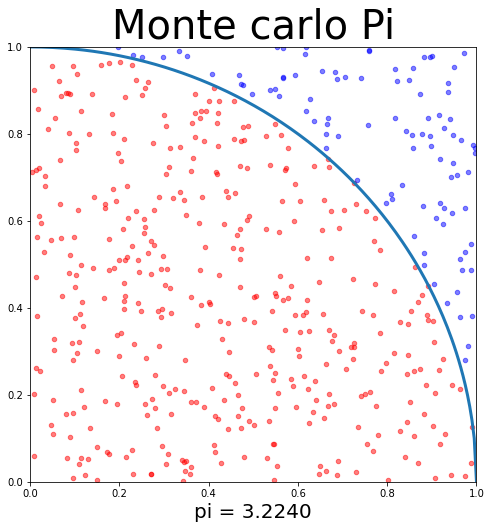

In [ ]:
# Find Pi value by monte carlo integration method

def func(x):
    fun = np.sqrt(1-x**2)
    return fun

from numpy import random

dirc = "%s/figure"%data

if (os.path.isdir('%s'%dirc) == False):
    os.mkdir('%s'%dirc)

fig = plt.figure(figsize=(8,8))
plt.xlim(0,1)
plt.ylim(0,1)
plot_X = np.linspace(0,1,200)
plt.plot(plot_X,func(plot_X),linewidth=3)
plt.title("Monte carlo Pi",size = 40)
fig.savefig("%s/0.png"%dirc)


def create_figure(x,y,count,i):
    if x**2+y**2<=1:
        plt.scatter(x,y,alpha=0.5,c="r",s = 20)
    else :
        plt.scatter(x,y,alpha=0.5,c="b",s = 20)
    plt.xlabel(f"pi = {4*count/i:.4f}",size = 20)



try_number = 500 # 시도 횟수 
x = random.random(size = try_number) # 0에서 1 사이 실수 리스트 생성
y = random.random(size = try_number)

result_list = np.array(func(x))

count = 0
img = cv2.imread('%s/0.png'%dirc)
height, width, layers = img.shape
size = (width,height)
out = cv2.VideoWriter("%s/pi.avi"%data,cv2.VideoWriter_fourcc(*'XVID'), 23, size)
out.write(img)
os.remove(f'{dirc}/{0}.png')

for i in range(try_number):
    #result_list[i]= func(x[i])
    if result_list[i] > y[i]:
        count +=1
    create_figure(x[i],y[i],count,i+1)
    fig.savefig("%s/%d.png"%(dirc,i+1))
    img = cv2.imread("%s/%d.png"%(dirc,i+1))
    out.write(img)
    os.remove(f'{dirc}/{i+1}.png')
    
        
out.release()
cv2.destroyAllWindows()
shutil.rmtree(r'%s'%dirc)


## Ising model
### Metropolis method

$$ H = -J\sum_{\left<i,j\right>}^N\sigma(i)\sigma(j), \Delta H = H(-\sigma(i)) - H(\sigma(i))  \\
P_i = e^{ -\Delta H /k_B T}$$

In [ ]:
# 2D- Ising kinetic Spin-flip model

from numpy import random

N = 100
step = 500
Temp = 0.2
config = 2*random.randint(0,2,size=(N,N))-1
nl, nr = np.zeros(N), np.zeros(N)
dirc = f"{data}/figure"

if (os.path.isdir('%s'%dirc) == False):
    os.mkdir('%s'%dirc)



def config_fig(config, T, mag, energy,t):
    fig = plt.figure(figsize=(5,5))
    ax = plt.axes()
    plt.pcolormesh(config, cmap=plt.cm.gray)
    plt.title(f"2D Ising model  Temp = {T}", size=20)
    plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
    plt.tick_params(axis = "y", which = "both", left = False, right = False)
    plt.setp(ax.get_xmajorticklabels(), visible=False)
    plt.setp(ax.get_ymajorticklabels(), visible=False)
    ax.set_xlabel(f"MCS={t}, Magnetization = {mag:.4f}, Enery ={energy:.4f}",size = 10)
    fig.savefig(f"{dirc}/{t}.png")
    plt.close('all')


def update(config):
    for i in range(N*N):
        x = random.randint(0,N); y = random.randint(0,N)
        dE = 2*config[x,y]*(config[x,(y+1)%N]+config[x,(y-1)%N]+config[(x-1)%N,y]+config[(x+1)%N,y])
        if dE < 0 :
            config[x,y] *=-1
        else :
            P = random.random()
            if P <= np.exp(-dE/Temp):
                config[x,y]*=-1    

def cal_mag(config):
    mag = abs(np.sum(config))
    return mag/(N*N)

def cal_energy(config):
    energy = 0
    for i in range(N):
        for j in range(N):
            energy += -config[i,j]*(config[(i+1)%N,j]+config[i,(j+1)%N])
    return energy/(N*N)


m = cal_mag(config)
e = cal_energy(config)
config_fig(config,Temp,m,e,0)
img = cv2.imread('%s/0.png'%dirc)
height, width, layers = img.shape
size = (width,height)
out = cv2.VideoWriter("%s/2D_ising.avi"%data,cv2.VideoWriter_fourcc(*'XVID'), 23, size)
out.write(img)
os.remove(f'{dirc}/{0}.png')

for i in range(step):
    update(config)
    m = cal_mag(config)
    e = cal_energy(config)
    config_fig(config,Temp,m,e,i+1)
    img = cv2.imread("%s/%d.png"%(dirc,i+1))
    out.write(img)
    os.remove(f'{dirc}/{i+1}.png')

out.release()
cv2.destroyAllWindows()
shutil.rmtree(r'%s'%dirc)


# 2D - XY Model 
$$ H = -J\sum_{\left<i,j\right>}\cos{\left(\theta_i - \theta_j\right)} $$
## Glauber dynamics
$$ P(\theta_i \rightarrow \theta'_i) =  \frac{e^{-\Delta E/{k_B T}}}{1+e^{-\Delta E/{k_B T}}}$$

In [ ]:
# 2D- Ising kinetic Spin-flip model

from numpy import random

N = 100
step = 1000
Temp = 0.05

config = np.pi*(2*random.random(size=(N,N))-1) # initial spin configuration
dirc = f"{data}/figure"

data_save = open(f"{data}/2D_XY_data.txt","w+")


if (os.path.isdir('%s'%dirc) == False):
    os.mkdir('%s'%dirc)

def config_fig(config, T, energy,t,vx,vy,avx,avy):
    fig = plt.figure(figsize=(5,5))
    ax = plt.axes()
    plt.pcolormesh(config, vmin=-np.pi, vmax=np.pi, cmap='binary',alpha=1)
    plt.xlim(0,N);plt.ylim(0,N)
    plt.grid(True)
    plt.title(f"2D XY model  Temp = {T}", size=20)
    plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
    plt.tick_params(axis = "y", which = "both", left = False, right = False)
    plt.scatter(vx, vy, s=7, marker='+', color='Red')
    plt.scatter(avx, avy, s=7, marker='o', color='Blue')
    plt.setp(ax.get_xmajorticklabels(), visible=False)
    plt.setp(ax.get_ymajorticklabels(), visible=False)
    ax.set_xlabel(f"MCS={t}, Enery ={energy:.4f}, Vorticity = {len(vx)+len(avx)}",size = 10)
    fig.savefig(f"{dirc}/{t}.png",dpi = 200)
    plt.close('all')

def phase(x):
    k = round(x)
    angle = x-k
    return angle 

def vorticity(config,vx,vy,avx,avy):
    for i in range (N) :
        for j in range (N) :
            s = config[i,j]
            s1 = config[(i+1)%N,j] - s
            s2 = config[(i+1)%N,(j+1)%N] - config[(i+1)%N,j]
            s3 = config[i,(j+1)%N] - config[(i+1)%N,(j+1)%N]
            s4 = s - config[i,(j+1)%N]
            q1 = phase(s1)
            q2 = phase(s2)
            q3 = phase(s3)
            q4 = phase(s4)
            a = (q1+q2+q3+q4)
            if a == 1  :
                vx.append(i)
                vy.append(j)
            if a == -1:
                avx.append(i)
                avy.append(j)
        
def update(config):
    for i in range(N*N):
        a = random.randint(0,N); b = random.randint(0,N)
        s = config[a,b]
        s1 = config[(a+1)%N,b]
        s2 = config[(a,(b+1)%N)]
        s3 = config[(a-1)%N,b]
        s4 = config[a,(b-1)%N]
        dth = np.pi*(2*random.random()-1)
        ediff1 = np.cos(s-s1) - np.cos(s-s1+dth)
        ediff2 = np.cos(s-s2) - np.cos(s-s2+dth)
        ediff3 = np.cos(s-s3) - np.cos(s-s3+dth)
        ediff4 = np.cos(s-s4) - np.cos(s-s4+dth)
        dE = ediff1 + ediff2 + ediff3 + ediff4
        P = random.random()
        if Temp <= 0. :
            if dE<0.0 : EX=1.0;
            elif dE==0.0 : EX=0.5;
            else : EX=0.0;
        else :
            A = np.exp(-dE/Temp)
            EX = (A/(A+1))
        
        if EX >= P : 
            s += dth
            if s >= np.pi: s -= np.pi
            if s <= -np.pi: s+= np.pi
        config[a,b] = s

def cal_energy(config):
    energy = 0
    for i in range(N):
        for j in range(N):
            ne = np.cos(config[i,j] - config[(i+1)%N,j])+np.cos(config[i,j]-config[i,(j+1)%N])
            energy += -ne
    return energy/(N*N)



e = cal_energy(config)
vx = []; vy = []
avx = []; avy = []
vorticity(config,vx,vy,avx,avy)
config_fig(config,Temp,e,0,vx,vy,avx,avy)
data_save.write(f"0\t{e:.5f}\t{(len(vx)+len(avx))/(N*N):.5f}\n")
img = cv2.imread('%s/0.png'%dirc)
height, width, layers = img.shape
size = (width,height)
out = cv2.VideoWriter("%s/2D_XY.avi"%data,cv2.VideoWriter_fourcc(*'XVID'), 23, size)
out.write(img)
os.remove(f'{dirc}/{0}.png')

for i in range(step):
    update(config)
    e = cal_energy(config)
    vx = []; vy = []
    avx = []; avy = []
    vorticity(config,vx,vy,avx,avy)
    config_fig(config,Temp,e,i+1,vx,vy,avx,avy)
    data_save.write(f"{i+1}\t{e:.5f}\t{(len(vx)+len(avx))/(N*N):.5f}\n")
    img = cv2.imread("%s/%d.png"%(dirc,i+1))
    out.write(img)
    os.remove(f'{dirc}/{i+1}.png')

out.release()
cv2.destroyAllWindows()
shutil.rmtree(r'%s'%dirc)

data_save.close()